In [102]:
import numpy as np
%pylab inline
from scipy.stats import pearsonr,spearmanr
plt.style.use('ggplot')
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['boxplot', 'draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


'common_sequential.mx'
'common_sequential.mx2'

## load data

In [19]:
def load_data(datpath):
    data = np.loadtxt(datpath,dtype='str')
    name = data[0,1:]
    pair1={}
    pair2={}
    for i in range(9):
        pair1[i] = data[1:,i+1].astype('float')
        pair2[i] = data[1:,i+10].astype('float')
    return pair1,pair2,name,data

In [107]:
## sss

### first mapping

In [20]:
pair1,pair2,name,data1 = load_data('common_sequential.mx')

In [103]:
### second mapping
**修正:不把map负链的去掉**

SyntaxError: invalid syntax (<ipython-input-103-e4902d130261>, line 2)

In [ ]:
pair1_,pair2_,name,data2 = load_data('common_sequential.mx2')

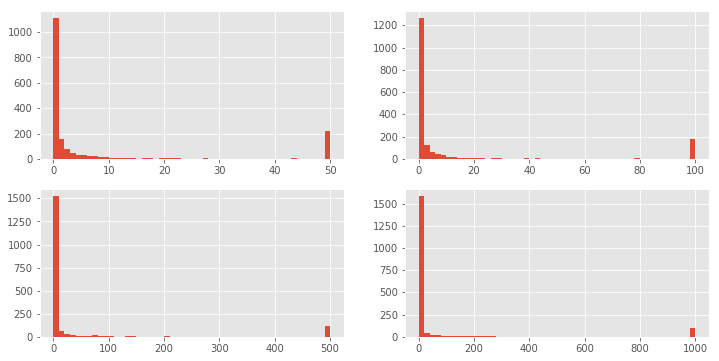

In [22]:
fig,ax=plt.subplots(2,2,figsize=(12,6))
thres = [50,100,500,1000]
for i in range(2):
    for j in range(2):
        ax[i,j].hist(np.clip(pair2_[0],0,thres[2*i+j]),bins=50)

## plot

### compare set threshold & do not set
pearsonr = $r = \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\Sigma(x_i - \bar{x})^2\Sigma(y_i - \bar{y})^2}}$ <br>
spearman: 等级变量之间的皮尔逊相关系数。 当数据大致分布并没有明显的离群点，皮尔逊相关系数的值和斯皮尔曼相关系数的值是相似的。对样本中的显著离群点，斯皮尔曼相关系数比皮尔逊相关系数**不敏感**。

In [23]:
def draw(threshold,i,data1,data2):
    fig,ax=plt.subplots(1,2,figsize=(12,6))
    index1 = np.where(data1<=threshold )[0]
    index2 = np.where(data2<=threshold )[0]
    index = np.intersect1d(index1,index2)
    pcc1 = np.around(pearsonr(data1,data2)[0],decimals=3)
    pcc2 = np.around(pearsonr(data1[index],data2[index])[0],decimals=3)
    spear1 = np.around(spearmanr(data1,data2)[0],decimals=3)
    spear2 = np.around(spearmanr(data1[index],data2[index])[0],decimals=3) 
    ax[0].scatter(data1,data2)
    ax[1].scatter(data1[index],data2[index])
    ax[0].set_title('no threshold '+ name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
    ax[1].set_title('threshold: '+str(threshold) + ' '+name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc2)+'\n'+ 'spearmanr: '+str(spear2))
    print ('PCC no threshold  :   '+str(pcc1),'Spearmanr no threshold  :  '+str(spear1))
    print ('PCC with threshold '+' :  '+str(pcc2),'Spearmanr with threshold '+' :  '+str(spear2))

### scatter plot

#### first mapping

('PCC no threshold  :   0.188', 'Spearmanr no threshold  :  0.522')
('PCC with threshold  :  0.636', 'Spearmanr with threshold  :  0.53')


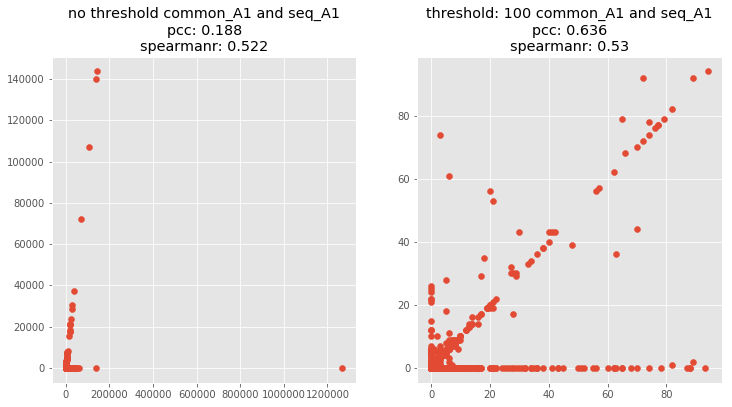

In [24]:
draw(100,0,pair1[0],pair2[0])

#### second mapping

('PCC no threshold  :   0.231', 'Spearmanr no threshold  :  0.866')
('PCC with threshold  :  0.893', 'Spearmanr with threshold  :  0.831')


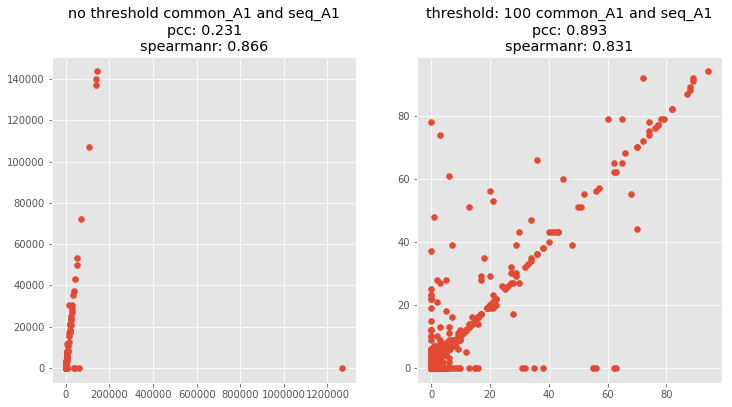

In [25]:
draw(100,0,pair1_[0],pair2_[0])

### check zero values

In [26]:
def check_zero(data1,data2):
    for i in range(9):
        print ((name[i],np.around(np.where(data1[i]==0)[0].shape[0]/float(data1[i].shape[0]),decimals=3))
               ,(name[i+9],np.around(np.where(data2[i]==0)[0].shape[0]/float(data2[i].shape[0]),decimals=3)),
               ('both zero: ', np.around(np.where((data1[i]==0)&(data2[i]==0))[0].shape[0]/float(data2[i].shape[0]),decimals=3)))
        

#### first mapping

In [27]:
check_zero(pair1,pair2)

(('common_A1', 0.612), ('seq_A1', 0.765), ('both zero: ', 0.574))
(('common_A2', 0.586), ('seq_A2', 0.742), ('both zero: ', 0.545))
(('common_A3', 0.56), ('seq_A3', 0.737), ('both zero: ', 0.523))
(('common_B1', 0.601), ('seq_B1', 0.773), ('both zero: ', 0.569))
(('common_B2', 0.541), ('seq_B2', 0.717), ('both zero: ', 0.499))
(('common_B3', 0.576), ('seq_B3', 0.747), ('both zero: ', 0.543))
(('common_N1', 0.594), ('seq_N1', 0.752), ('both zero: ', 0.562))
(('common_N2', 0.593), ('seq_N2', 0.758), ('both zero: ', 0.56))
(('common_N3', 0.588), ('seq_N3', 0.759), ('both zero: ', 0.554))


#### second mapping

In [28]:
check_zero(pair1_,pair2_)

(('common_A1', 0.612), ('seq_A1', 0.596), ('both zero: ', 0.562))
(('common_A2', 0.586), ('seq_A2', 0.567), ('both zero: ', 0.531))
(('common_A3', 0.56), ('seq_A3', 0.547), ('both zero: ', 0.507))
(('common_B1', 0.601), ('seq_B1', 0.591), ('both zero: ', 0.554))
(('common_B2', 0.541), ('seq_B2', 0.526), ('both zero: ', 0.49))
(('common_B3', 0.576), ('seq_B3', 0.562), ('both zero: ', 0.528))
(('common_N1', 0.594), ('seq_N1', 0.577), ('both zero: ', 0.549))
(('common_N2', 0.593), ('seq_N2', 0.584), ('both zero: ', 0.551))
(('common_N3', 0.588), ('seq_N3', 0.576), ('both zero: ', 0.544))


### check zero position

In [29]:
def check_zero_position(data):
    img = data[1:,1:].astype('float')
    rep = np.repeat(img,50,axis=1)
    rep[rep!=0] =1
    fig,ax=plt.subplots(1,2,figsize=(16,16))
    ax[0].matshow(rep,cmap=cm.Greys_r)
    newdata = np.ndarray([1869,18])
    for i in range(9):
        newdata[:,2*i] = img[:,i]
        newdata[:,2*i+1] = img[:,i+9]
    rep_ = np.repeat(newdata,50,axis=1)
    rep_[rep_!=0] =1
    ax[1].matshow(rep_,cmap=cm.Greys_r)

#### first mapping

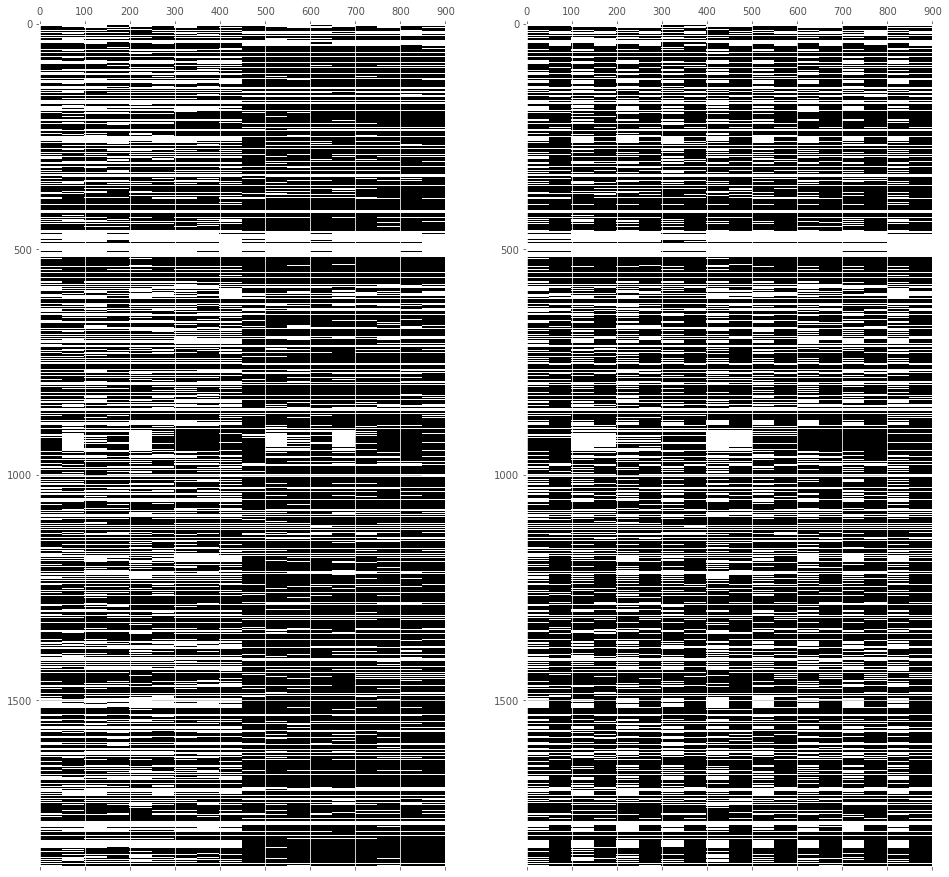

In [30]:
check_zero_position(data1)

#### second mapping

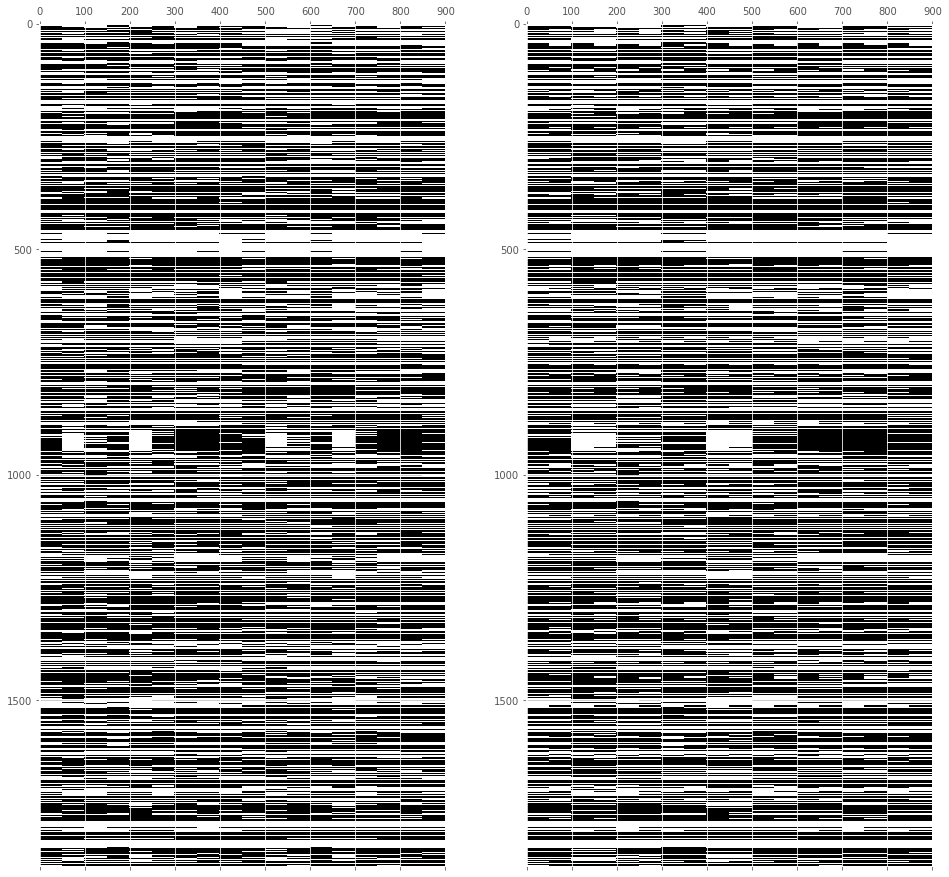

In [31]:
check_zero_position(data2)

###  check different positions

In [32]:
def diff_position(data,data_):
    img = data[1:,1:].astype('float')
    diffdat= np.abs(img[:,:9] - img[:,9:])
    a = diffdat
    rep_ = np.repeat(diffdat,100,axis=1)
    fig,ax=plt.subplots(1,2,figsize=(32,32))
    rep_[rep_!=0] =1
    rep_
    ax[0].matshow(rep_,cmap=cm.Greys_r)
    img = data_[1:,1:].astype('float')
    diffdat= np.abs(img[:,:9] - img[:,9:])
    b = diffdat
    rep_ = np.repeat(diffdat,100,axis=1)
    rep_[rep_!=0] =1
    ax[1].matshow(rep_,cmap=cm.Greys_r)
    return a,b

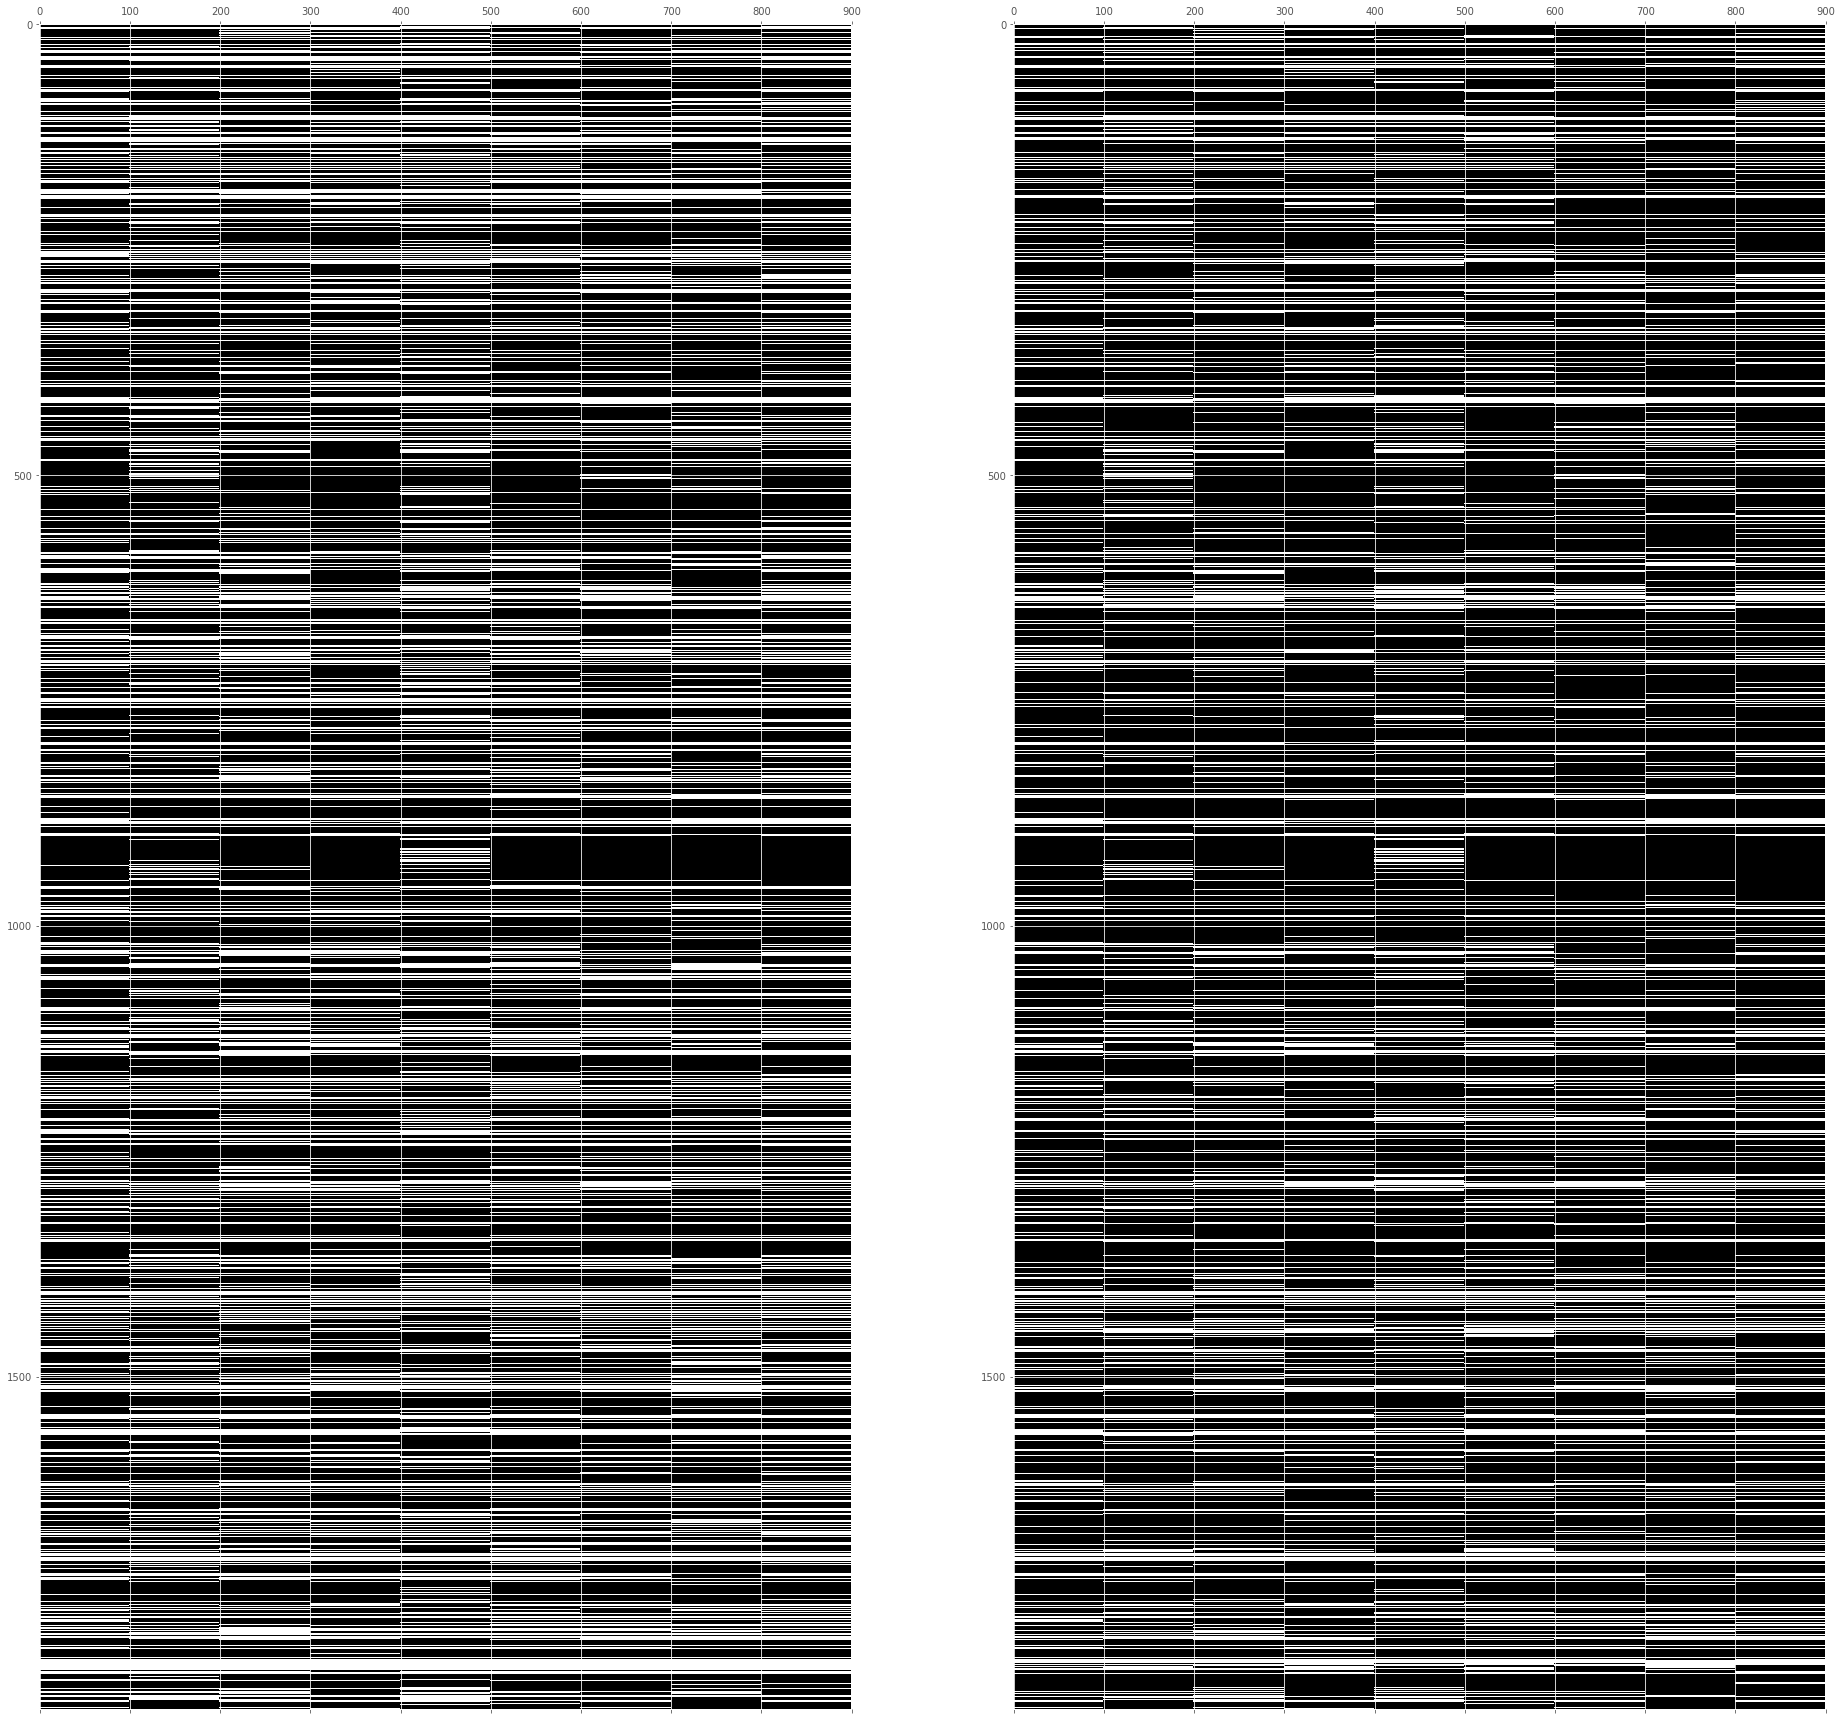

In [33]:
dif1,dif2 = diff_position(data1,data2)

#### counts of same gene

In [35]:
names = ['A1','A2','A3','B1','B2','B3','N1','N2','N3']
for i in range(9):
    print (names[i], np.where(dif1[:,i] ==0)[0].shape[0])

('A1', 1284)
('A2', 1241)
('A3', 1231)
('B1', 1285)
('B2', 1195)
('B3', 1245)
('N1', 1285)
('N2', 1272)
('N3', 1251)


In [36]:
for i in range(9):
    print (names[i],np.where(dif2[:,i] ==0)[0].shape[0])

('A1', 1428)
('A2', 1388)
('A3', 1380)
('B1', 1429)
('B2', 1361)
('B3', 1388)
('N1', 1430)
('N2', 1437)
('N3', 1423)


#### remove both genes' values are zeros
条件：两个位置不能都为零，且差值为零

In [82]:
for i in range(9):
    indres1 = np.where(dif1[:,i] ==0)[0]
    indres2 = np.where((pair1[i]!=0 )|(pair2[i]!=0))[0]
    indres = np.intersect1d(indres1,indres2)
    print (names[i],indres.shape[0])

('A1', 212)
('A2', 222)
('A3', 253)
('B1', 221)
('B2', 262)
('B3', 230)
('N1', 234)
('N2', 226)
('N3', 216)


In [83]:
indress = {}
for i in range(9):
    indres1 = np.where(dif2[:,i] ==0)[0]
    indres2 = np.where((pair1_[i]!=0 )|(pair2_[i]!=0))[0]
    indres = np.intersect1d(indres1,indres2)
    indress[i] = indres
    print (names[i],indres.shape[0])

('A1', 544)
('A2', 580)
('A3', 614)
('B1', 561)
('B2', 636)
('B3', 584)
('N1', 570)
('N2', 565)
('N3', 576)


### remove zero values

In [37]:
def draw_0(i,dat1,dat2):
    '''
    dat1 = pair1,
    '''
    data1 = dat1[i]
    data2 = dat2[i]
    fig,ax=plt.subplots(1,2,figsize=(14,6))
    index = np.where(data2!=0)[0]
    pcc1 = np.around(pearsonr(data1,data2)[0],decimals=3)
    pcc2 = np.around(pearsonr(data1[index],data2[index])[0],decimals=3)
    spear1 = np.around(spearmanr(data1,data2)[0],decimals=3)
    spear2 = np.around(spearmanr(data1[index],data2[index])[0],decimals=3) 
    ax[0].scatter(data1,data2)
    ax[1].scatter(data1[index],data2[index])
    ax[0].set_title('not remove zero value: '+ name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
    ax[1].set_title('remove zero value: '+name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc2)+'\n'+ 'spearmanr: '+str(spear2))
    print ('PCC not remove zero value  :   '+str(pcc1),'Spearmanr not remove zero value  :  '+str(spear1))
    print ('PCC remove zero value '+' :  '+str(pcc2),'Spearmanr remove zero value '+' :  '+str(spear2))

#### first mapping

('PCC not remove zero value  :   0.188', 'Spearmanr not remove zero value  :  0.522')
('PCC remove zero value  :  0.988', 'Spearmanr remove zero value  :  0.815')
('PCC not remove zero value  :   0.072', 'Spearmanr not remove zero value  :  0.541')
('PCC remove zero value  :  0.989', 'Spearmanr remove zero value  :  0.772')


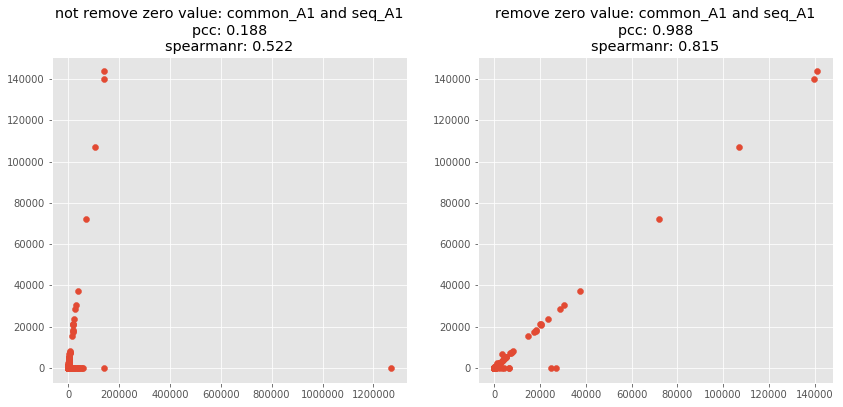

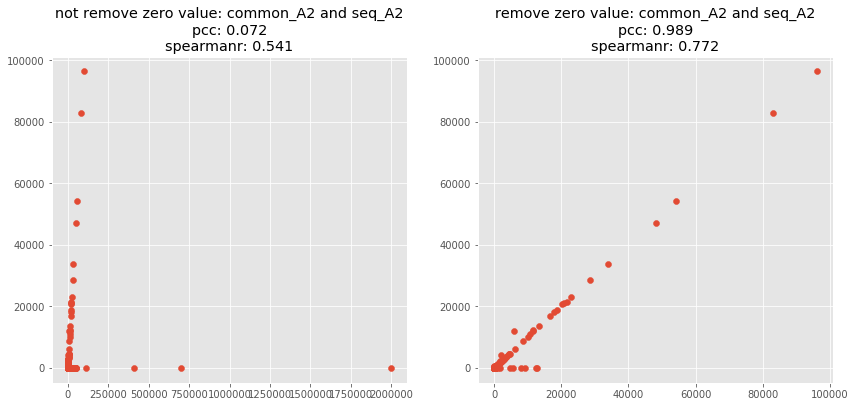

In [38]:
for i in range(2):
    draw_0(i,pair1,pair2)

#### second mapping

('PCC not remove zero value  :   0.231', 'Spearmanr not remove zero value  :  0.866')
('PCC remove zero value  :  0.999', 'Spearmanr remove zero value  :  0.901')
('PCC not remove zero value  :   0.212', 'Spearmanr not remove zero value  :  0.862')
('PCC remove zero value  :  0.998', 'Spearmanr remove zero value  :  0.884')


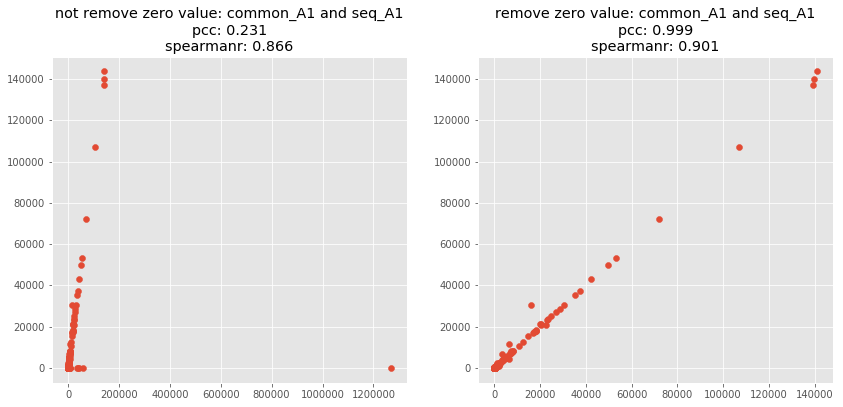

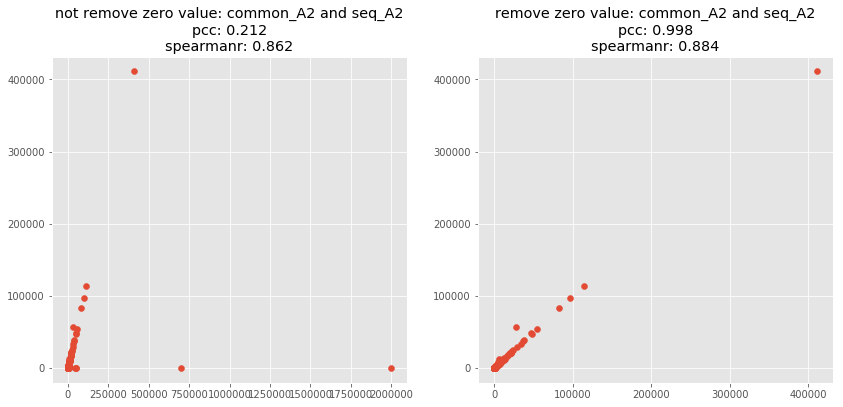

In [39]:
for i in range(2):
    draw_0(i,pair1_,pair2_)

### Boxplot of differences in same positions

In [40]:
names = ['A1','A2','A3','B1','B2','B3','N1','N2','N3']
dif1.shape

(1869, 9)

In [41]:
def boxplot(diff,threshold,count,opt=True):
    fig,ax  =  plt.subplots(figsize=(100,20))
    if opt:
        diff[diff>=threshold] = 0
        dat = diff
        sns.boxplot(data =dat,ax=ax,boxprops=dict(alpha=.5))
        ax.set_title(u'difference between samples',fontsize=80)
        ax.set_xticks(range(9))
        ax.set_xticklabels(names,fontsize=40)
        ax.set_yticks(range(count))
        #labels = [item.get_text() for item in ax.get_yticklabels()]
        ax.set_yticklabels(range(count),fontsize=40)
        return dat
    else:
        sns.boxplot(data =diff,ax=ax,boxprops=dict(alpha=.5))
        ax.set_title(u'difference between samples',fontsize=80)
        ax.set_xticks(range(9))
        ax.set_xticklabels(names,fontsize=40)

#### first mapping

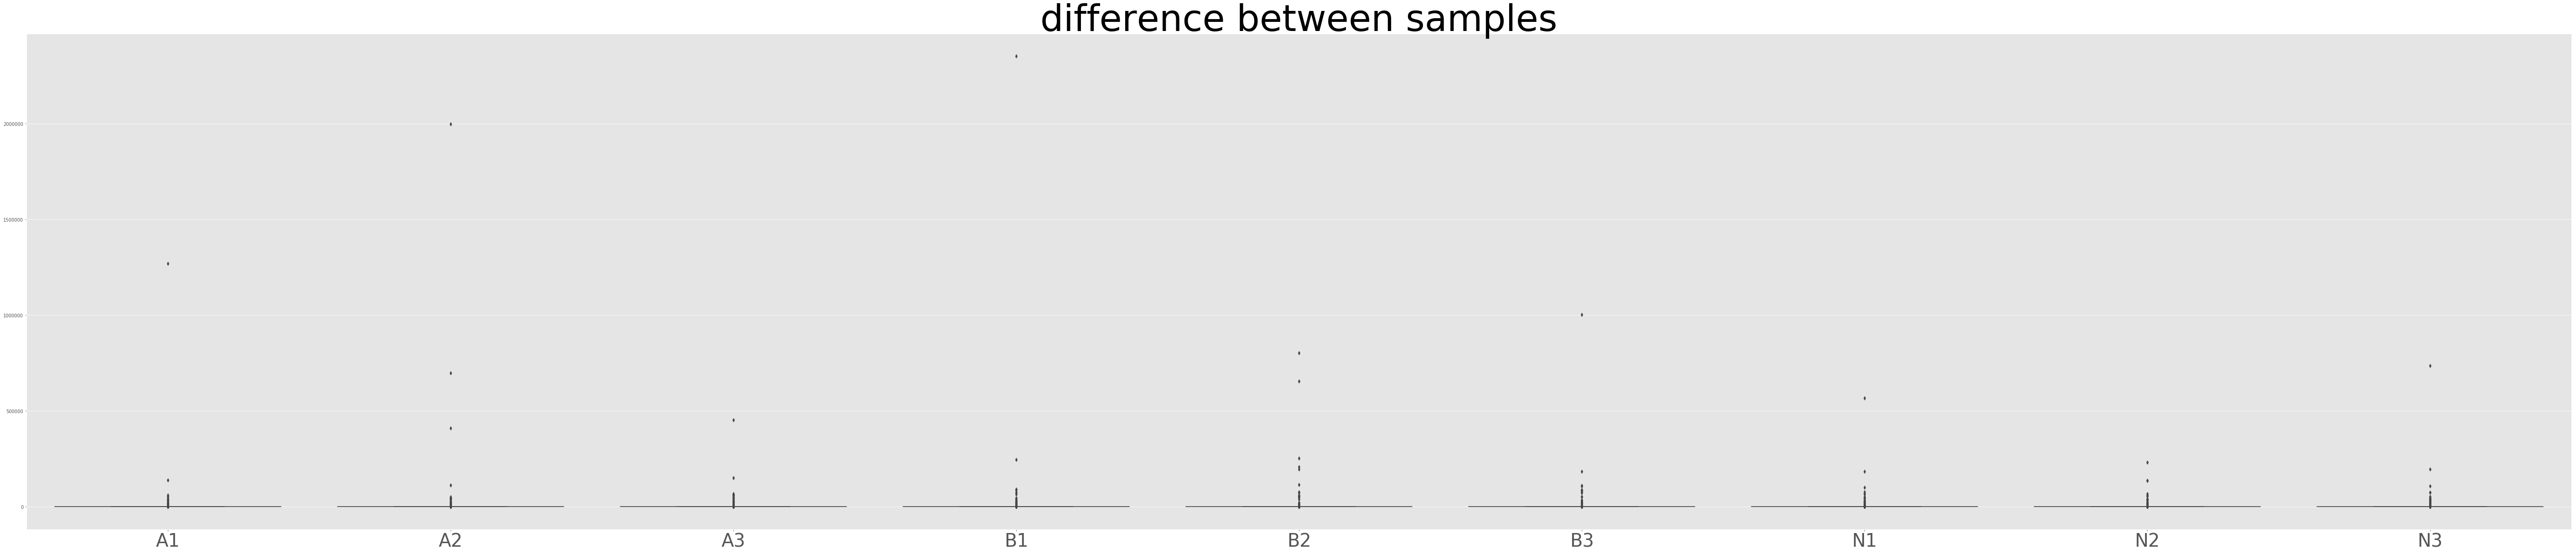

In [42]:
boxplot(dif1,0,10,False)

#### second mapping

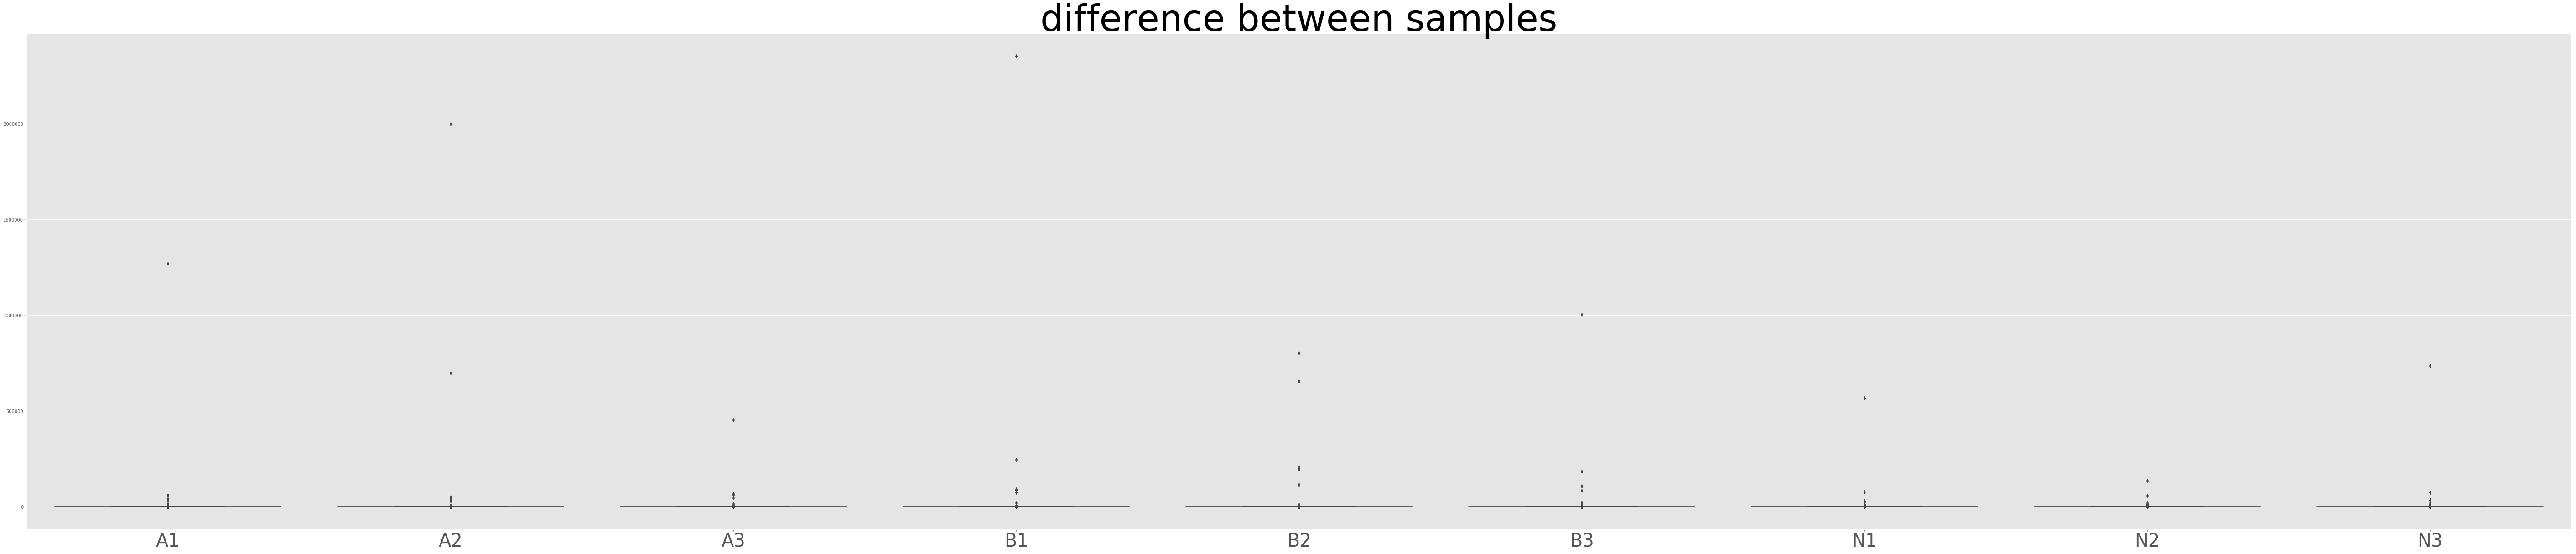

In [43]:
boxplot(dif2,0,10,False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

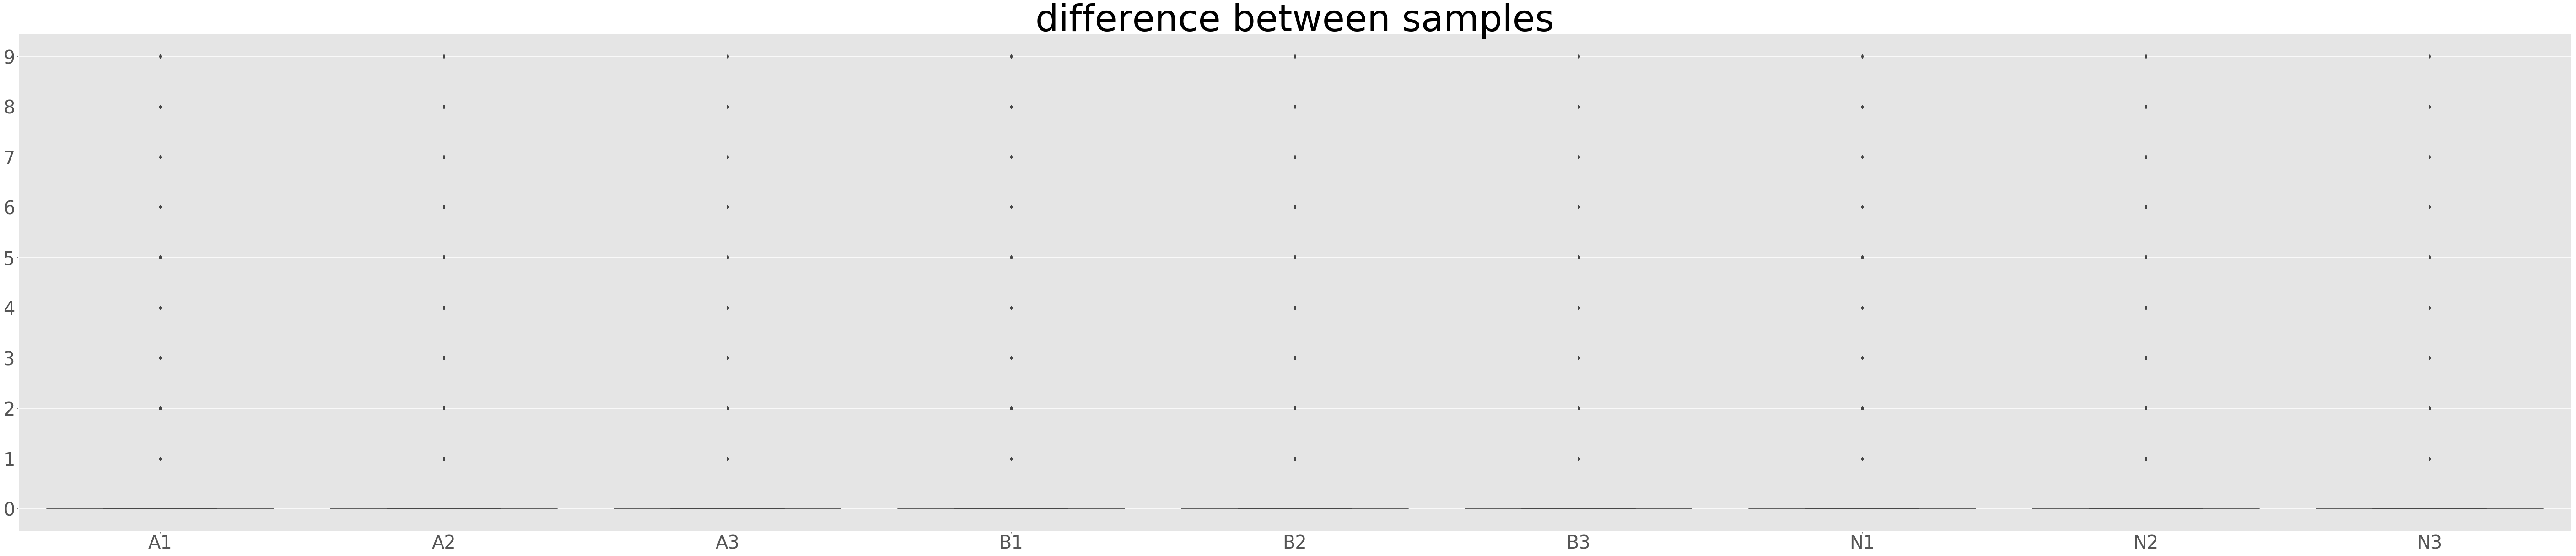

In [44]:
boxplot(dif2,10,10,True)

(array([1.428e+03, 9.700e+01, 5.000e+01, 2.800e+01, 1.500e+01, 1.300e+01,
        1.200e+01, 7.000e+00, 1.000e+01, 1.000e+00, 7.000e+00, 5.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 1.320e+02]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects

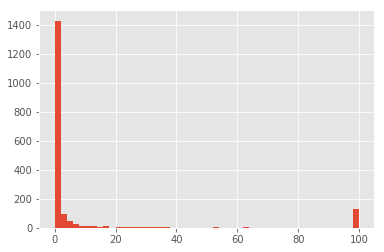

In [45]:
hist(np.clip(dif1[:,0],0,100),bins=50)

### remove by ratio

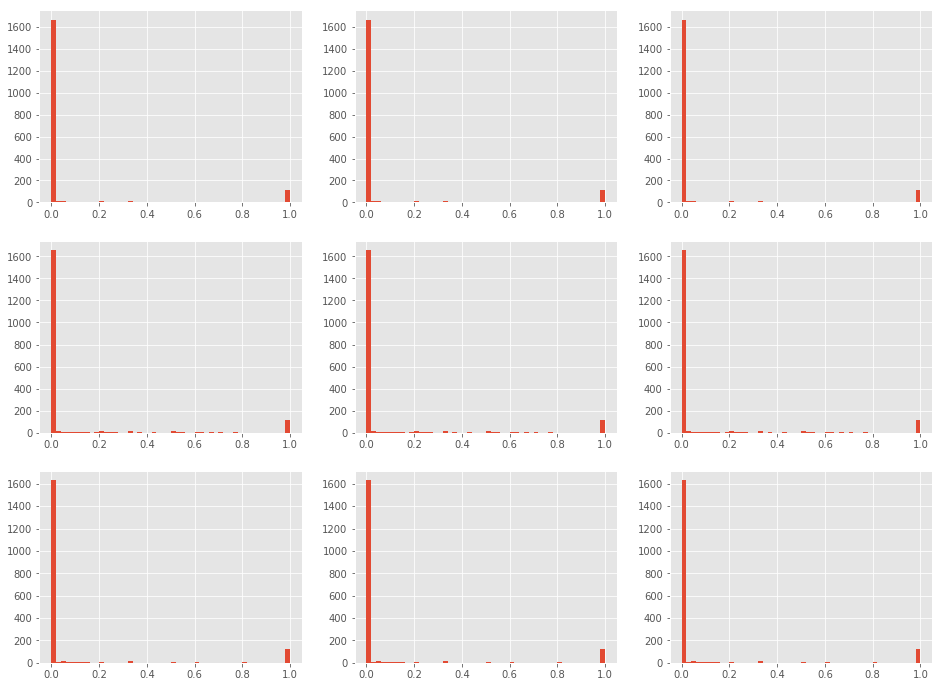

In [62]:
fig,ax=plt.subplots(3,3,figsize=(16,12))
totaldif = {}
for i in range(3):
    for j in range(3):
        sumarr = pair1_[i]+pair2_[i]
        sumind = np.where(sumarr!=0)[0]
        eqo = dif2[:,i][sumind]/sumarr[sumind]
        totaldif[i*3+j] = np.where(eqo==1)
        allval =np.concatenate((eqo,np.zeros(pair1_[i].shape[0]-sumind.shape[0])))
        ax[i,j].hist(allval,bins=50)

In [64]:
totaldif[0]

(array([  2,   7,   9,  19,  20,  45,  69,  70,  74,  77, 100, 106, 110,
        114, 131, 140, 142, 149, 162, 169, 171, 173, 174, 196, 198, 208,
        252, 254, 275, 276, 288, 289, 295, 299, 303, 312, 325, 328, 332,
        336, 355, 362, 363, 374, 376, 401, 403, 406, 407, 420, 421, 422,
        431, 438, 448, 450, 452, 458, 459, 463, 471, 473, 480, 486, 489,
        503, 504, 520, 525, 538, 556, 566, 567, 573, 580, 582, 587, 589,
        591, 592, 593, 597, 599, 604, 605, 619, 627, 631, 632, 633, 635,
        636, 643, 647, 651, 683, 686, 692, 696, 702, 703, 706, 707, 711,
        712, 735, 749, 756, 763, 782, 785, 809, 811, 814, 815, 817]),)

In [74]:
def draw_newthres(i,data1,data2):
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    index = np.setdiff1d(range(data1.shape[0]),totaldif[i])
    pcc1 = np.around(pearsonr(data1,data2)[0],decimals=3)
    pcc2 = np.around(pearsonr(data1[index],data2[index])[0],decimals=3)
    spear1 = np.around(spearmanr(data1,data2)[0],decimals=3)
    spear2 = np.around(spearmanr(data1[index],data2[index])[0],decimals=3) 
    ax[0].scatter(data1,data2)
    ax[1].scatter(data1[index],data2[index])
    ax[0].set_title('no threshold '+ name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
    ax[1].set_title('threshold: '+ ' '+name[i]+' and '+name[i+9]+'\n'+'pcc: '+str(pcc2)+'\n'+ 'spearmanr: '+str(spear2))
    print ('PCC no threshold  :   '+str(pcc1),'Spearmanr no threshold  :  '+str(spear1))
    print ('PCC with threshold '+' :  '+str(pcc2),'Spearmanr with threshold '+' :  '+str(spear2))

('PCC no threshold  :   0.231', 'Spearmanr no threshold  :  0.866')
('PCC with threshold  :  0.966', 'Spearmanr with threshold  :  0.87')


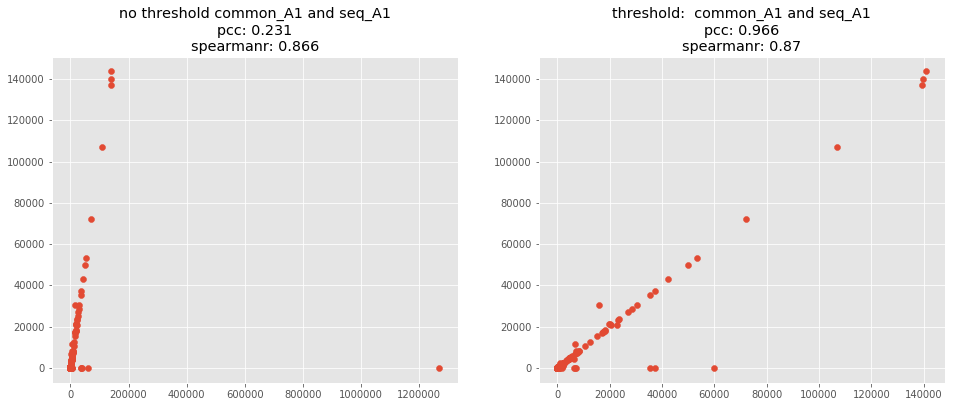

In [75]:
draw_newthres(0,pair1_[0],pair2_[0])

('PCC:   0.966', 'Spearmanr:  0.87')
('PCC:   0.224', 'Spearmanr:  0.863')
('PCC:   0.949', 'Spearmanr:  0.856')
('PCC:   0.087', 'Spearmanr:  0.86')
('PCC:   0.304', 'Spearmanr:  0.868')
('PCC:   0.27', 'Spearmanr:  0.866')
('PCC:   0.6', 'Spearmanr:  0.881')
('PCC:   0.957', 'Spearmanr:  0.885')
('PCC:   0.498', 'Spearmanr:  0.877')


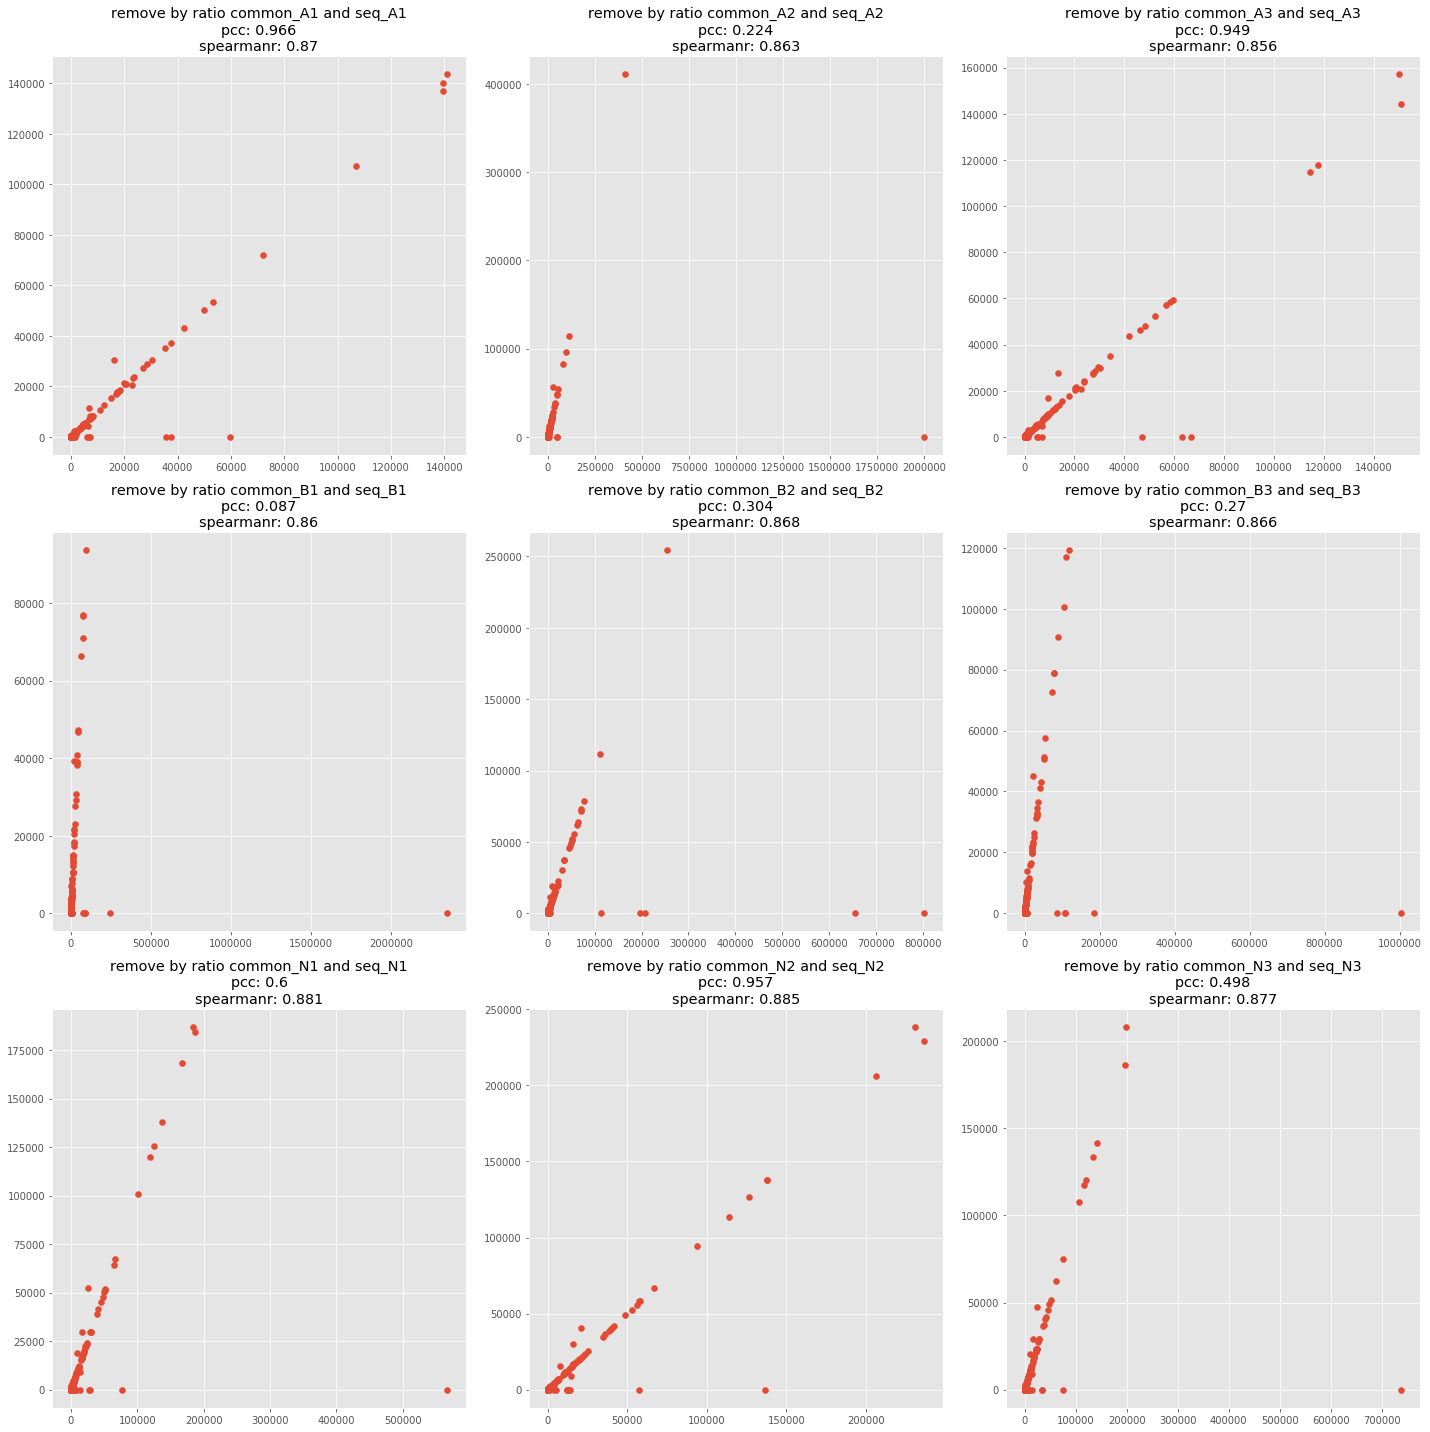

In [72]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
for i in range(3):
    for j in range(3):
        index = np.setdiff1d(range(pair1_[i*3+j].shape[0]),totaldif[i*3+j])
        pcc1 = np.around(pearsonr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        spear1 = np.around(spearmanr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        ax[i,j].scatter(pair1_[i*3+j][index],pair2_[i*3+j][index])
        ax[i,j].set_title('remove by ratio '+ name[i*3+j]+' and '+name[i*3+j+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
        print ('PCC:   '+str(pcc1),'Spearmanr:  '+str(spear1))
fig.tight_layout()

###  whole plot

#### do not remove

('PCC:   0.231', 'Spearmanr:  0.866')
('PCC:   0.212', 'Spearmanr:  0.862')
('PCC:   0.564', 'Spearmanr:  0.855')
('PCC:   0.098', 'Spearmanr:  0.864')
('PCC:   0.318', 'Spearmanr:  0.87')
('PCC:   0.302', 'Spearmanr:  0.869')
('PCC:   0.601', 'Spearmanr:  0.884')
('PCC:   0.958', 'Spearmanr:  0.885')
('PCC:   0.5', 'Spearmanr:  0.879')


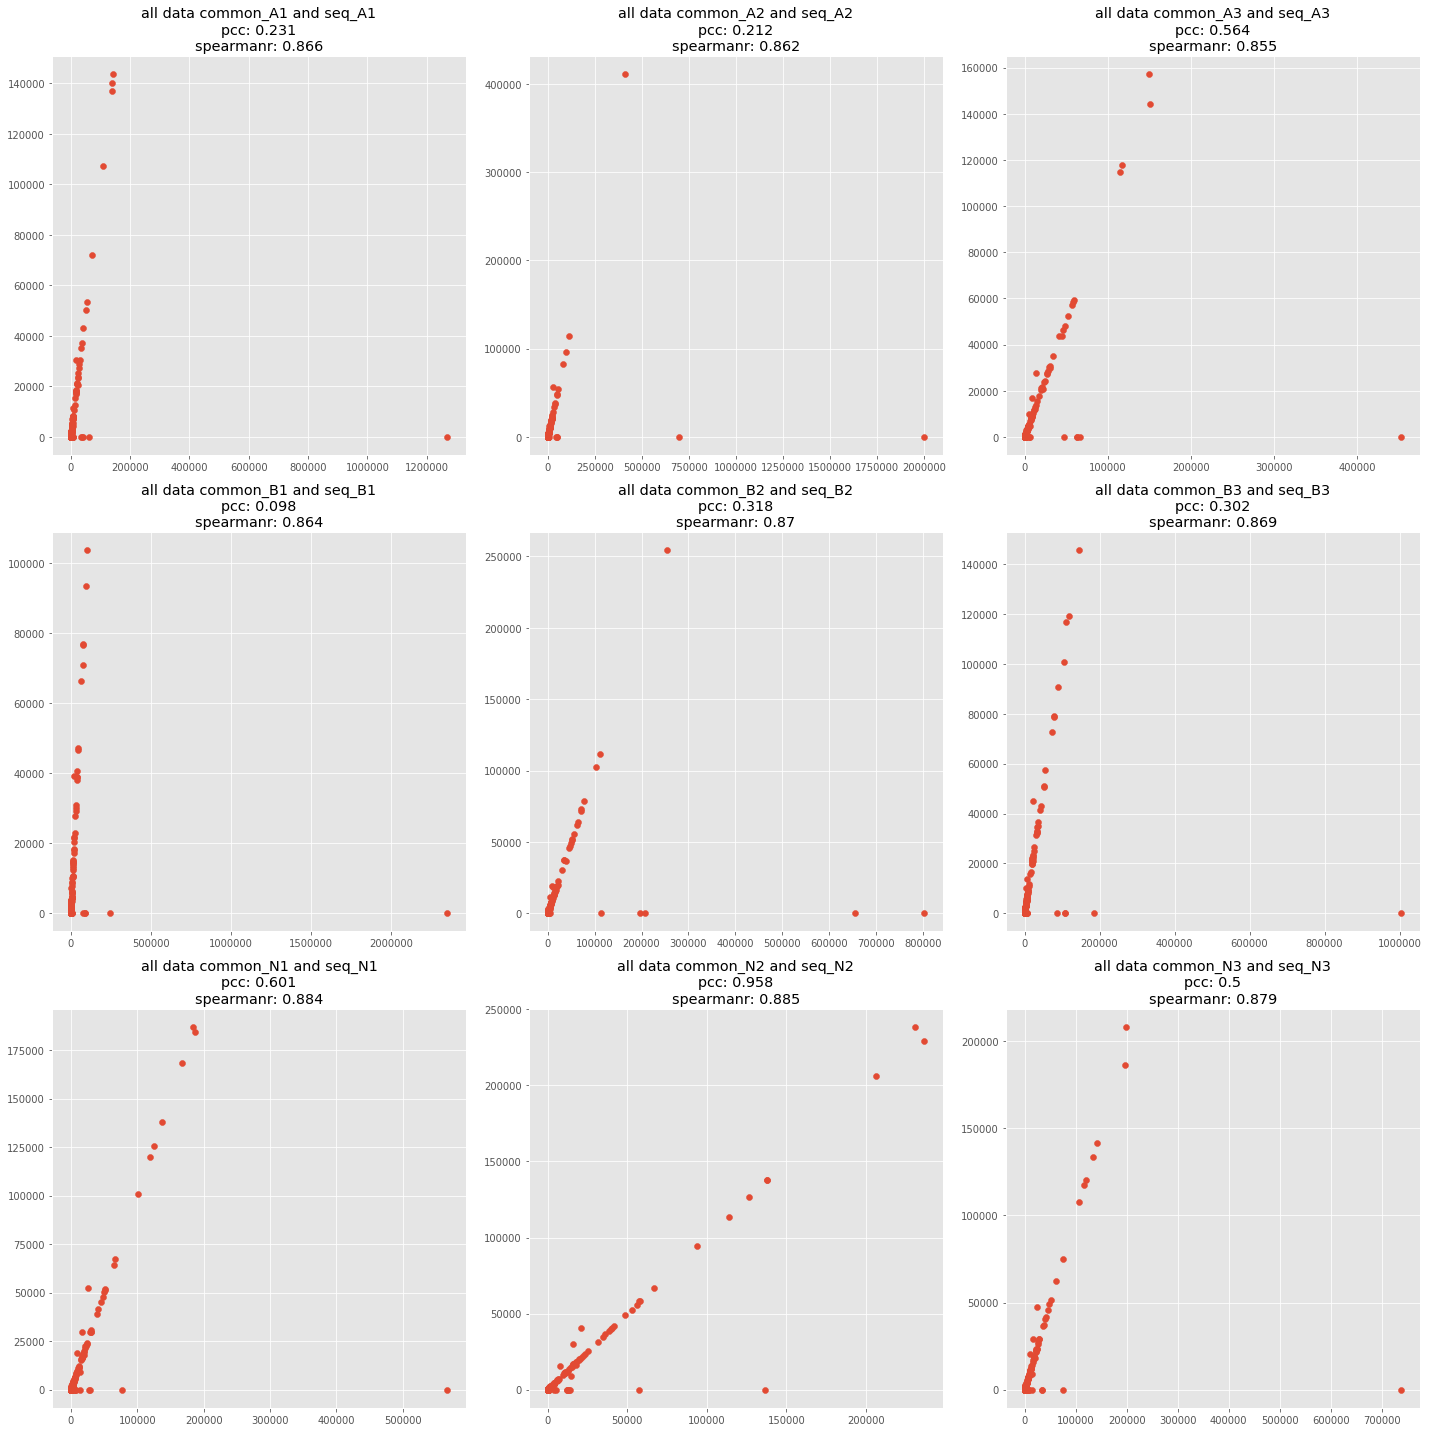

In [73]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
for i in range(3):
    for j in range(3):
        pcc1 = np.around(pearsonr(pair1_[i*3+j],pair2_[i*3+j])[0],decimals=3)
        spear1 = np.around(spearmanr(pair1_[i*3+j],pair2_[i*3+j])[0],decimals=3)
        ax[i,j].scatter(pair1_[i*3+j],pair2_[i*3+j])
        ax[i,j].set_title('all data '+ name[i*3+j]+' and '+name[i*3+j+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
        print ('PCC:   '+str(pcc1),'Spearmanr:  '+str(spear1))
fig.tight_layout()

#### remove both positions' values are zero

In [85]:
indresss = {}
for i in range(9):
    indres1 = np.where(dif2[:,i] ==0)[0]
    indres2 = np.where((pair1_[i]==0 )&(pair2_[i]==0))[0]
    indres = np.intersect1d(indres1,indres2)
    indresss[i] = indres
    print (names[i],indres.shape[0])

('A1', 1051)
('A2', 993)
('A3', 948)
('B1', 1036)
('B2', 916)
('B3', 987)
('N1', 1026)
('N2', 1029)
('N3', 1017)


('PCC:   0.226', 'Spearmanr:  0.762')
('PCC:   0.209', 'Spearmanr:  0.758')
('PCC:   0.559', 'Spearmanr:  0.739')
('PCC:   0.093', 'Spearmanr:  0.749')
('PCC:   0.312', 'Spearmanr:  0.767')
('PCC:   0.295', 'Spearmanr:  0.755')
('PCC:   0.596', 'Spearmanr:  0.786')
('PCC:   0.957', 'Spearmanr:  0.796')
('PCC:   0.494', 'Spearmanr:  0.777')


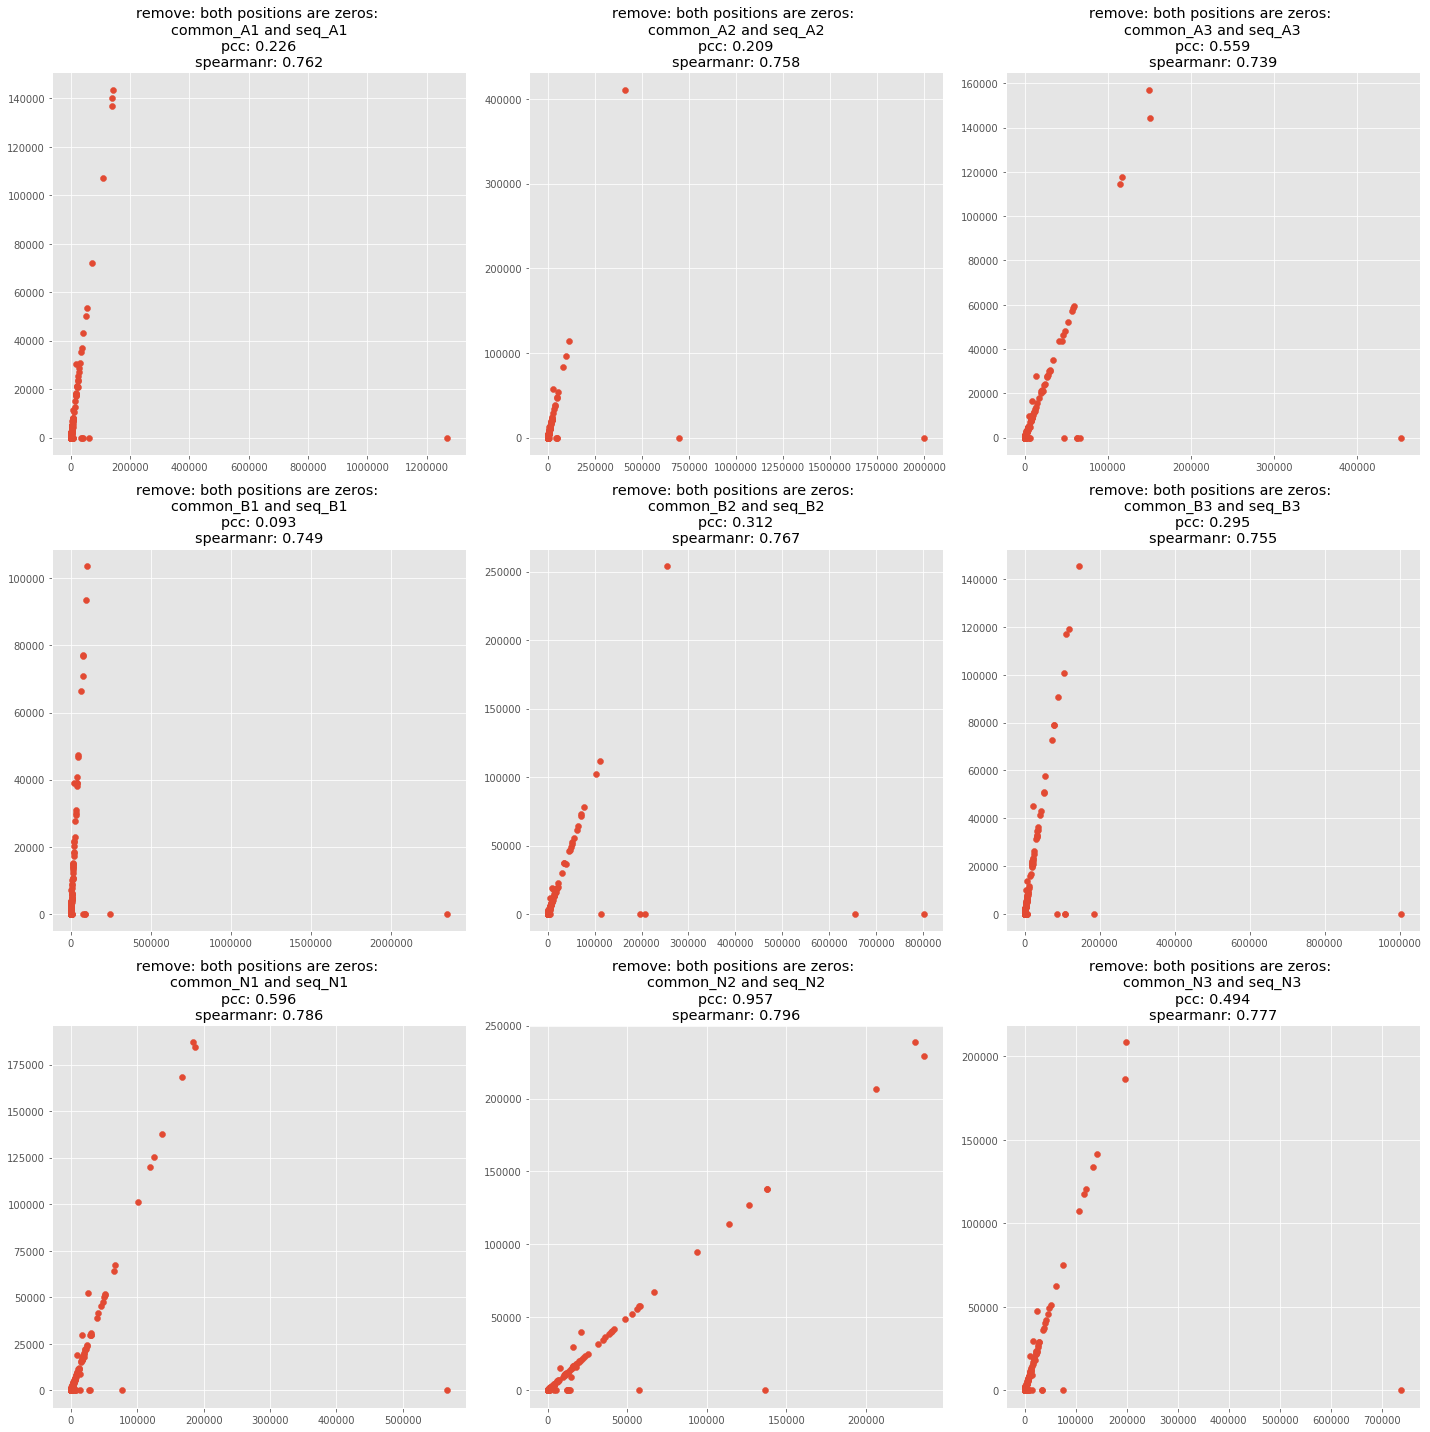

In [93]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
for i in range(3):
    for j in range(3):
        index = np.setdiff1d(range(pair1_[i*3+j].shape[0]),indresss[i*3+j])
        pcc1 = np.around(pearsonr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        spear1 = np.around(spearmanr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        ax[i,j].scatter(pair1_[i*3+j][index],pair2_[i*3+j][index])
        ax[i,j].set_title('remove: both positions are zeros: '+'\n'+ name[i*3+j]+' and '+name[i*3+j+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
        print ('PCC:   '+str(pcc1),'Spearmanr:  '+str(spear1))
fig.tight_layout()

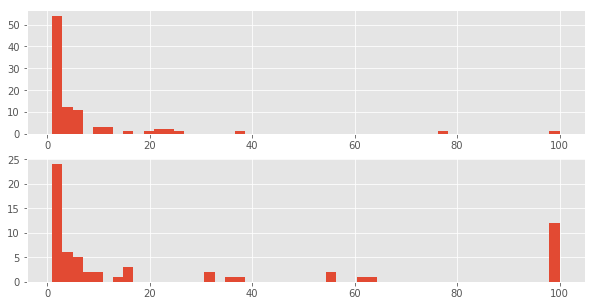

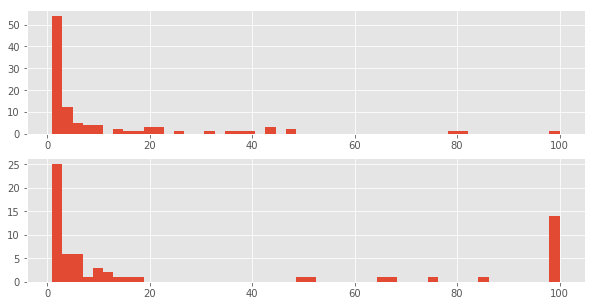

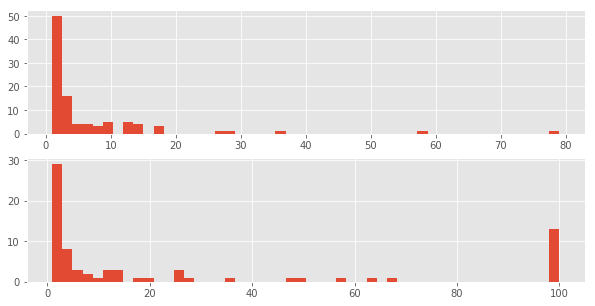

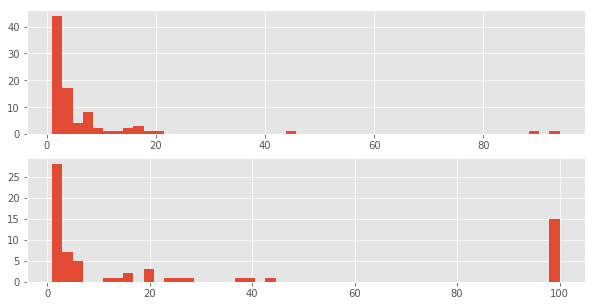

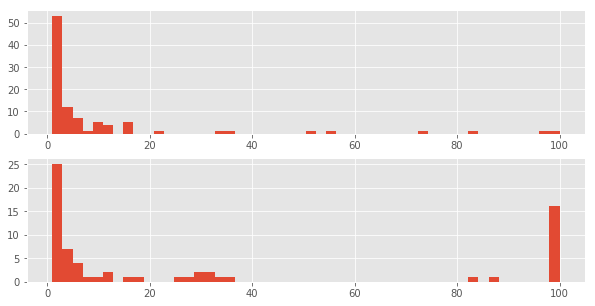

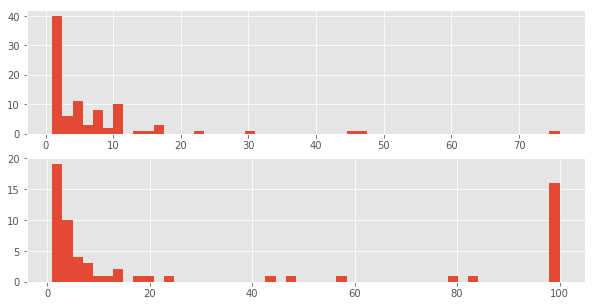

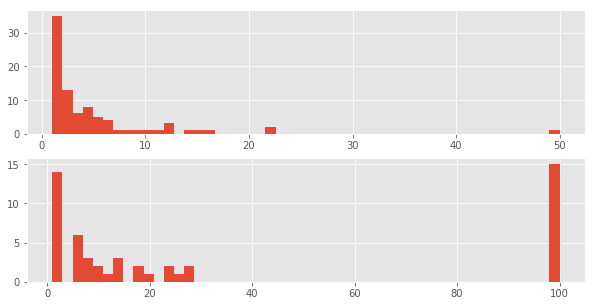

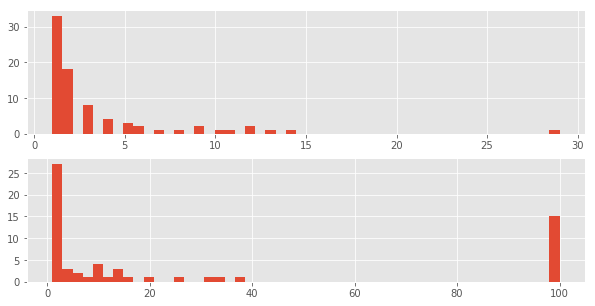

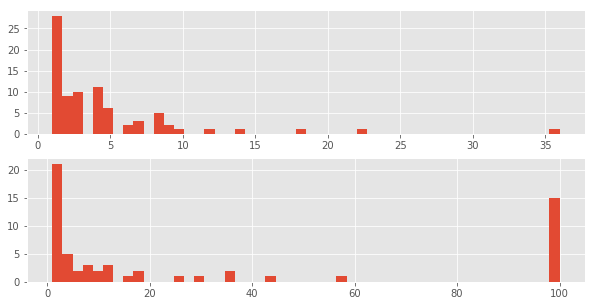

In [101]:
for i in range(9):
    indd = np.where((pair1_[i]==0)&(pair2_[i]==0 ))
    indres1_ = np.setdiff1d(np.where(pair1_[i]==0 ),indd)
    indres2_ = np.setdiff1d(np.where(pair2_[i]==0 ),indd)
    fig,ax=plt.subplots(2,figsize=(10,5))
    ax[0].hist(np.clip(pair2_[i][indres1_],0,100),bins=50)
    ax[1].hist(np.clip(pair1_[i][indres2_],0,100),bins=50)  

fig,ax=plt.subplots(3,3,figsize=(20,20))
for i in range(3):
    for j in range(3):
        index = indress[i*3+j]
        pcc1 = np.around(pearsonr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        spear1 = np.around(spearmanr(pair1_[i*3+j][index],pair2_[i*3+j][index])[0],decimals=3)
        ax[i,j].scatter(pair1_[i*3+j][index],pair2_[i*3+j][index])
        ax[i,j].set_title('remove '+ name[i*3+j]+' and '+name[i*3+j+9]+'\n'+'pcc: '+str(pcc1)+'\n'+ 'spearmanr: '+str(spear1))
        print ('PCC:   '+str(pcc1),'Spearmanr:  '+str(spear1))
fig.tight_layout()